In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Window Time Threshold comparison

To calculate real contact time we use position files

In [2]:
# Parameters for calculations
nodeA_id = 1
nodeB_id = 2
broadcast_time = [0.65, 1.25, 2.5] #seconds
log_position_time = 0.1 #seconds
window_time_threshold = 0.1

In [18]:


bt = min(broadcast_time)
nodeA_pos_file_name = f'../results/n{nodeA_id}_{window_time_threshold}wt-{bt}bt-{log_position_time}lp_position.csv'
nodeB_pos_file_name = f'../results/n{nodeB_id}_{window_time_threshold}wt-{bt}bt-{log_position_time}lp_position.csv'

position_file_header = ['node_A', 'timestamp_A', 'x_pos_A', 'y_pos_A']
nodeA_pos = pd.read_csv(nodeA_pos_file_name, names=position_file_header)
position_file_header = ['node_B', 'timestamp_B', 'x_pos_B', 'y_pos_B']
nodeB_pos = pd.read_csv(nodeB_pos_file_name, names=position_file_header)

df_pos = pd.concat([nodeA_pos, nodeB_pos], axis=1)

# real_contact_time = (np.sqrt(np.power(nodeA_pos.x_pos-nodeB_pos.x_pos, 2)+np.power(nodeA_pos.y_pos-nodeB_pos.y_pos, 2))<2.0)
df_pos['distance'] = (np.sqrt(np.power(df_pos.x_pos_A-df_pos.x_pos_B, 2)+np.power(df_pos.y_pos_A-df_pos.y_pos_B, 2)))<2.0

# print(f'Real contact time for {bt}s of broadcast time: {real_contact_time}')
adj_check = (df_pos.distance != df_pos.distance.shift()).cumsum()
adj_check


0          1
1          1
2          1
3          1
4          1
        ... 
13195    263
13196    263
13197    263
13198    263
13199    263
Name: distance, Length: 13200, dtype: int32

Now we prepare and plot total contact time based vs window time threshold and compare it with the real contact time.

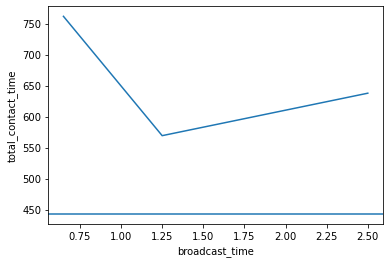

In [4]:
# Dataframe preparation
result_file_header = ["node", "broadcast_time", "seen_id", "told_by", "hop", "start", "end"]
total_contact_time = pd.DataFrame()

for bt in broadcast_time:
    nodeA_res_file_name = f'../results/n{nodeA_id}_{window_time_threshold}wt-{bt}bt-{log_position_time}lp_results.csv'
    nodeB_res_file_name = f'../results/n{nodeB_id}_{window_time_threshold}wt-{bt}bt-{log_position_time}lp_results.csv'

    nodeA_res = pd.read_csv(nodeA_res_file_name, names=result_file_header)
    nodeB_res = pd.read_csv(nodeB_res_file_name, names=result_file_header)
    df = pd.concat([nodeA_res, nodeB_res], ignore_index=True)
    df["total_contact_time"] = df["end"]-df["start"]
    df["broadcast_time"] = bt
    total_contact_time = pd.concat([total_contact_time, df], ignore_index=True)


total_contact_time = total_contact_time.drop(["told_by", "hop", "start", "end"], axis=1).groupby(["node", "seen_id", "broadcast_time"], as_index=False).sum()
total_contact_time[total_contact_time.node==1]
# total_contact_time["frecuency"] = 1/total_contact_time["broadcast_time"]
# df["total_contact_time"] = df["total_contact_time"]/3600
# Plot
plot = sns.lineplot(x="broadcast_time", y="total_contact_time", data=total_contact_time[total_contact_time.node==1])
plot.axhline(real_contact_time)
plt.show()